# Laboratorul 3

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

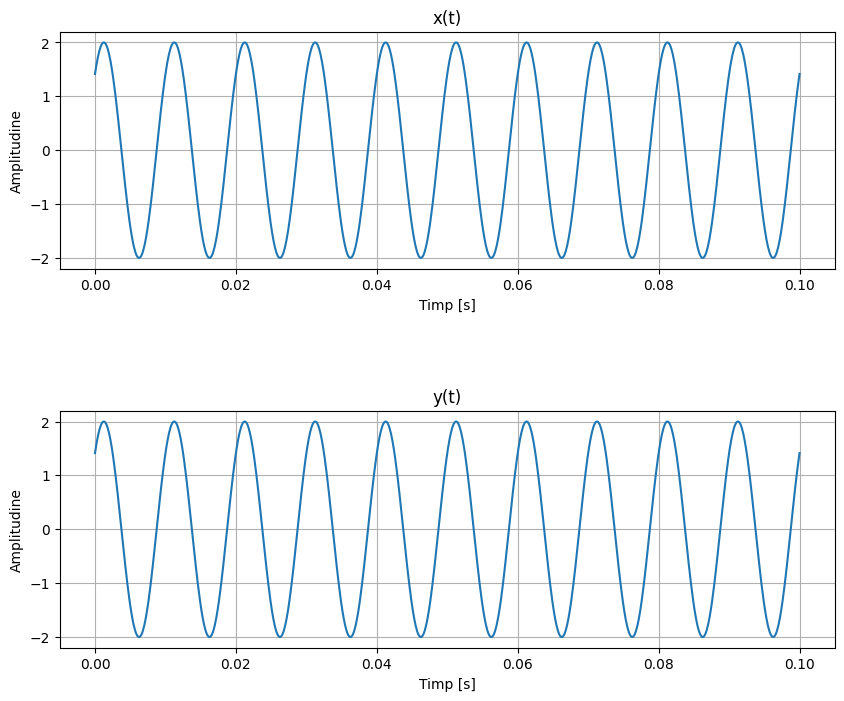

In [30]:
A = 2
f = 100
phix = np.pi / 4
phiy = phix - np.pi / 2

x = lambda t : A * np.sin(2 * np.pi * f * t + phix)
y = lambda t : A * np.cos(2 * np.pi * f * t + phiy)

start = 0
fs = 100 * f
Ts = 1 / fs
stop = 0.1

t = np.arange(start, stop + Ts, Ts)

fig, axs = plt.subplots(2, figsize = (10, 8))

plt.subplots_adjust(hspace = 0.6)

axs[0].set_title('x(t)')
axs[0].set_xlabel('Timp [s]')
axs[0].set_ylabel('Amplitudine')
axs[0].grid(True)
axs[0].plot(t, x(t))

axs[1].set_title('y(t)')
axs[1].set_xlabel('Timp [s]')
axs[1].set_ylabel('Amplitudine')
axs[1].grid(True)
axs[1].plot(t, y(t))

## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

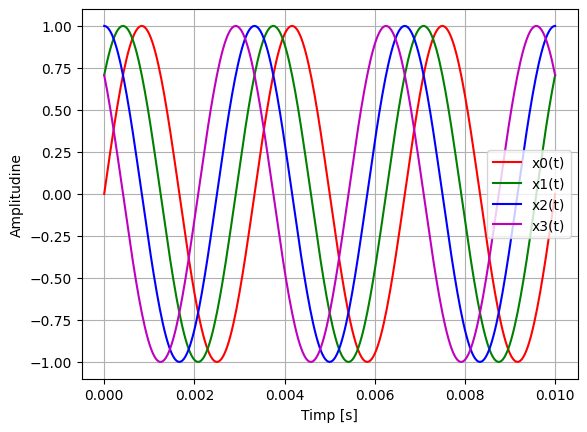

In [31]:
A = 1
f = 300
phi0 = 0 * np.pi / 4
phi1 = 1 * np.pi / 4
phi2 = 2 * np.pi / 4
phi3 = 3 * np.pi / 4

x0 = lambda t : A * np.sin(2 * np.pi * f * t + phi0)
x1 = lambda t : A * np.sin(2 * np.pi * f * t + phi1)
x2 = lambda t : A * np.sin(2 * np.pi * f * t + phi2)
x3 = lambda t : A * np.sin(2 * np.pi * f * t + phi3)

start = 0
fs = 100 * f
Ts = 1 / fs
stop = 0.01

t = np.arange(start, stop + Ts, Ts)

plt.plot(t, x0(t), 'r', label = 'x0(t)')
plt.plot(t, x1(t), 'g', label = 'x1(t)')
plt.plot(t, x2(t), 'b', label = 'x2(t)')
plt.plot(t, x3(t), 'm', label = 'x3(t)')

plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid(True)

plt.legend()

## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

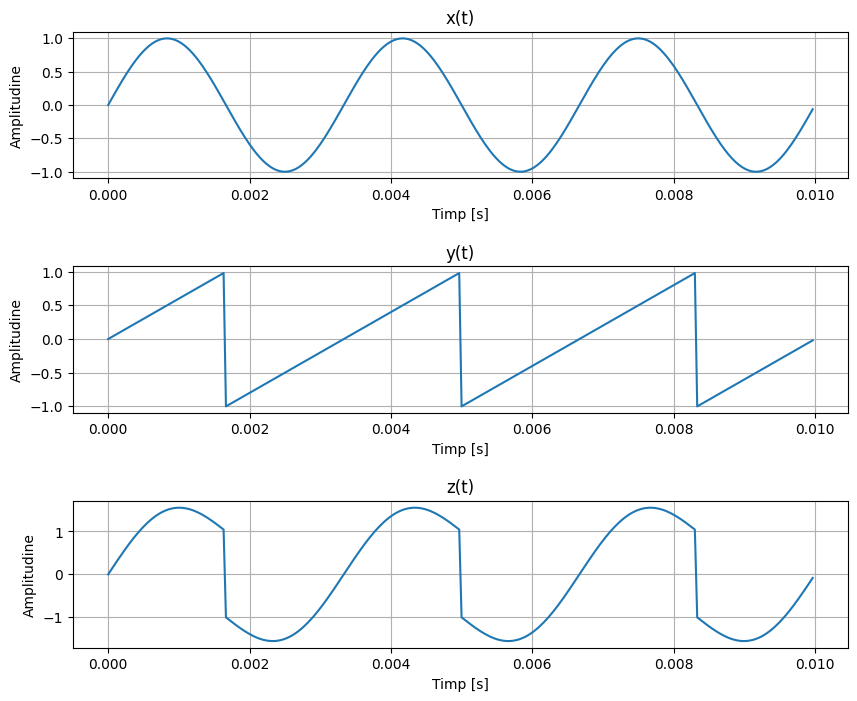

In [32]:
f = 300

start = 0
fs = 100 * f
Ts = 1 / fs
stop = 0.01

t = np.arange(start, stop, Ts)

x = lambda t : np.sin(2 * np.pi * f * t)
y = lambda t : 2 * (f * t - np.floor(f * t + 0.5))
z = lambda t : x(t) + y(t)

fig, axs = plt.subplots(3, figsize = (10, 8))

plt.subplots_adjust(hspace = 0.6)

axs[0].set_title('x(t)')
axs[0].set_xlabel('Timp [s]')
axs[0].set_ylabel('Amplitudine')
axs[0].grid(True)
axs[0].plot(t, x(t))

axs[1].set_title('y(t)')
axs[1].set_xlabel('Timp [s]')
axs[1].set_ylabel('Amplitudine')
axs[1].grid(True)
axs[1].plot(t, y(t))

axs[2].set_title('z(t)')
axs[2].set_xlabel('Timp [s]')
axs[2].set_ylabel('Amplitudine')
axs[2].grid(True)
axs[2].plot(t, z(t))

## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [33]:
start = 0
fs = 44100
Ts = 1 / fs
stop = 3

t = np.arange(start, stop + Ts, Ts)

f1 = 700
x1 = lambda t : np.sin(2 * np.pi * f1 * t)

f2 = 3500
x2 = lambda t : np.sin(2 * np.pi * f2 * t)

t = np.arange(start, stop + Ts, Ts)
x = lambda t : np.concatenate([x1(t), x2(t)])

# rate = int(fs)
# scipy.io.wavfile.write('ps-lab-3-ex4.wav', rate, x(t))

sounddevice.play(x(t), fs)
sounddevice.wait()

## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 500 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

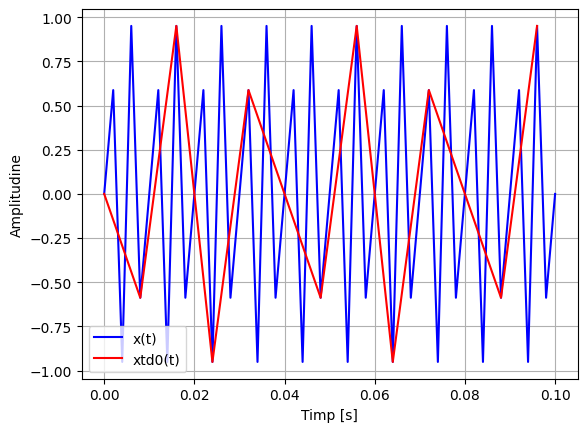

In [34]:
A = 1
f = 200
phi = 0

start = 0
fs = 500
Ts = 1 / fs
stop = 0.1

t = np.arange(start, stop + Ts, Ts)

x = lambda t : A * np.sin(2 * np.pi * f * t + phi)

t = np.arange(start, stop + Ts, Ts)
xt = x(t)

d = 4
offset = 0
td0 = t[offset::d]
xtd0 = xt[offset::d]

plt.plot(t, xt, 'b', label = 'x(t)')
plt.plot(td0, xtd0, 'r', label = 'xtd0(t)')

plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid(True)

plt.legend()

# Decimarea la 1/4 din frecventa initiala de esantionare este echivalenta cu esantionarea la fs / 4 => 500 Hz / 4 = 125 Hz < 2 * 200 Hz (este sub limita Nyquist, ceea ce duce la aliasing)
# Cu cat decimam mai mult (scadem frecventa de esantionare), cu atat avem un semnal mai putin reprezentativ si confundabil cu alte semnale prin fenomenul de aliere (aliasing)

2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

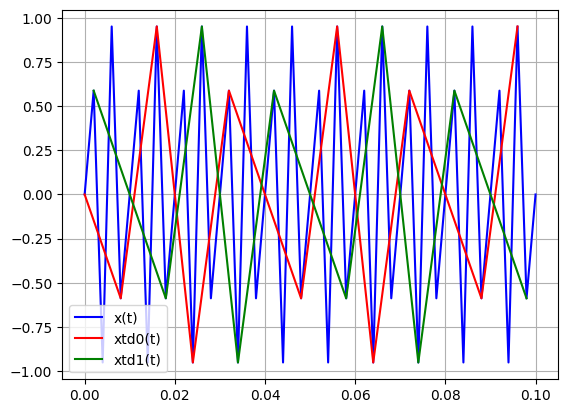

In [35]:
offset = 1
td1 = t[offset::d]
xtd1 = xt[offset::d]

plt.plot(t, xt, 'b', label = 'x(t)')
plt.plot(td0, xtd0, 'r', label = 'xtd0(t)')
plt.plot(td1, xtd1, 'g', label = 'xtd1(t)')
plt.grid(True)

plt.legend()

# Din grafic observam faptul ca decimarea nu este invarianta in timp, deoarece alegerea unui offset are impact asupra formei finale a semnalului decimat.
# De asemenea, acest lucru devine si mai vizibil cand frecventa de esantionare este scazuta sau chiar sub limita frecventei Nyquist.

## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

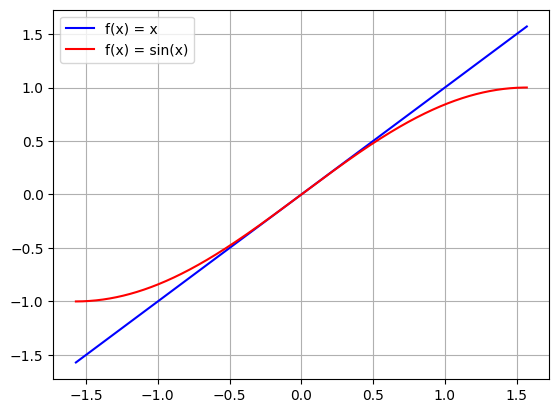

In [36]:
start = -np.pi/2
stop = np.pi/2
n = 1000

x = np.linspace(start, stop, n)

plt.plot(x, x, 'b', label = 'f(x) = x')
plt.plot(x, np.sin(x), 'r', label = 'f(x) = sin(x)')
plt.grid(True)

plt.legend()

# Da, pentru valori mici ale lui x, aproximarea sin(x) ~ x este foarte buna. Observam ca cele 2 curbe sunt foarte apropiate in intervalul [-pi/12, pi/12], aproximativ [-0.26, 0.26]